# Imports

In [19]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

In [46]:
def plot_class_distribution(df, width=6, height=5, xlim_tol=3e3):
    label_count = df['level'].value_counts()
    fig = plt.figure(figsize=(width, height))
    countplot = sns.countplot(y=df['level'], order=label_count.index)
    countplot.bar_label(countplot.containers[0], padding=2)
    plt.title('Quantidade de Imagens por Severidade', pad=10)
    plt.xlabel('Número de Amostras')
    plt.xlim(0, label_count.iloc[0] + xlim_tol)
    plt.ylabel('Severidade')
    plt.show()
    return fig

<br>

# Reduced Eyepacs Distribution

In [22]:
df_reduced_eyepacs = pd.read_csv('../datasets/reduced_eyepacs_resized_cropped/metadata_imbalanced.csv')

In [23]:
df_reduced_eyepacs

,patient_id,side,image,level,level_group,groups,split
0,10,left,0/10_left.jpeg,0,nref,left_nref,val
1,10,right,0/10_right.jpeg,0,nref,right_nref,test
2,13,left,0/13_left.jpeg,0,nref,left_nref,train
3,13,right,0/13_right.jpeg,0,nref,right_nref,test
4,15,left,1/15_left.jpeg,1,nref,left_nref,test
...,...,...,...,...,...,...,...
35103,44347,right,0/44347_right.jpeg,0,nref,right_nref,test
35104,44348,left,0/44348_left.jpeg,0,nref,left_nref,train
35105,44348,right,0/44348_right.jpeg,0,nref,right_nref,test
35106,44349,left,0/44349_left.jpeg,0,nref,left_nref,train


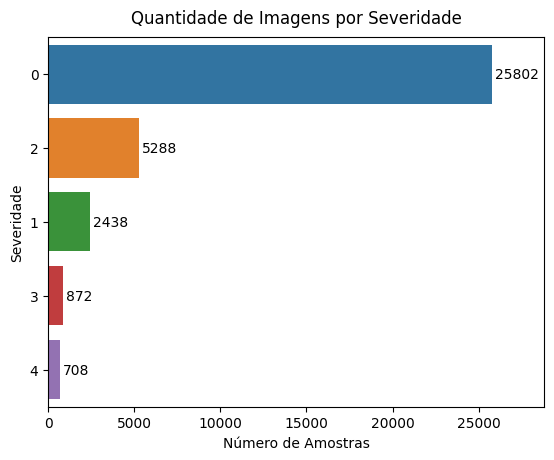

In [12]:
reduced_eyepacs = plot_class_distribution(df_reduced_eyepacs)

In [176]:
fig.savefig('./images/class_count_reduced_eyepacs.png', format='png')

<br>

# EyePacs Severity Samples

In [16]:
df = df_reduced_eyepacs

Trying with random seed 8363
Patient with id: 9539 have different severities. Trying another random seed
Trying with random seed 5489
Patient with id: 7349 have different severities. Trying another random seed
Trying with random seed 5551
Patient with id: 27810 have different severities. Trying another random seed
Trying with random seed 1409
Patient with id: 32307 have different severities. Trying another random seed
Trying with random seed 3328
Patient with id: 26487 have different severities. Trying another random seed
Trying with random seed 1537
All patients has both eyes within the same RD severity classification
Random seed: 1537


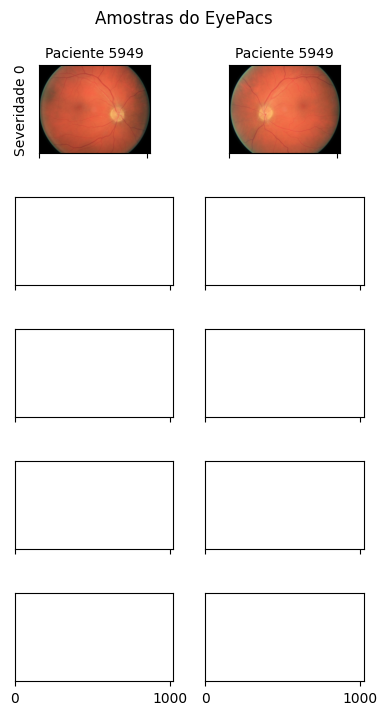

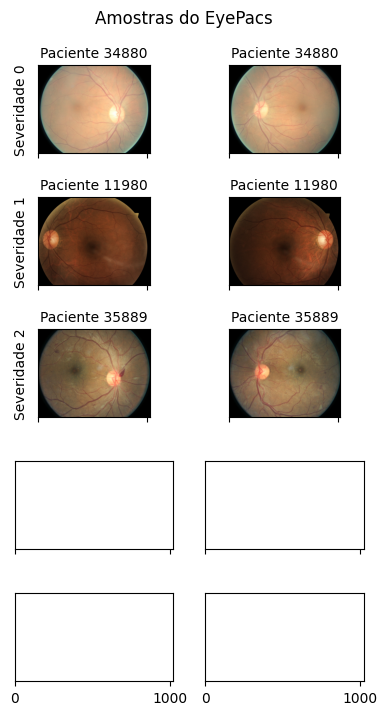

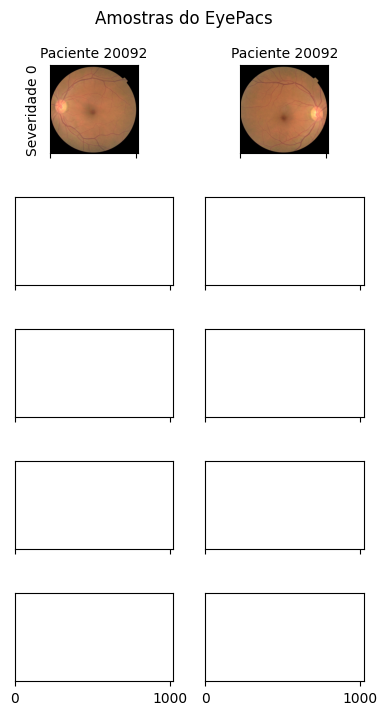

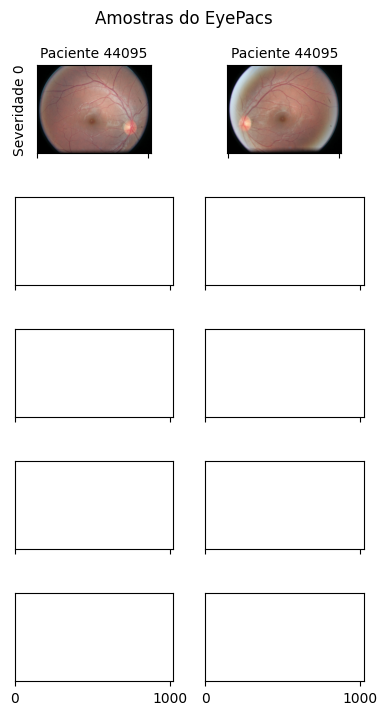

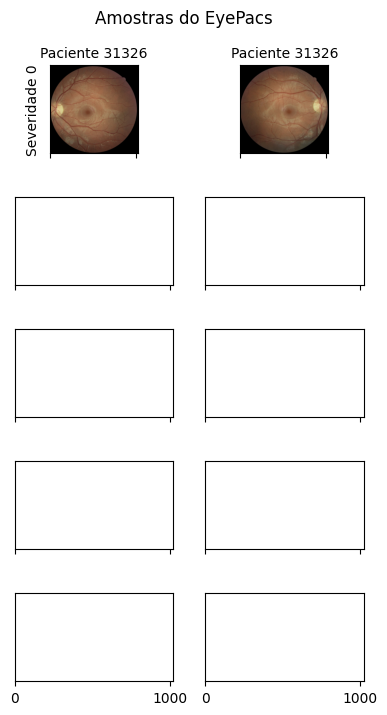

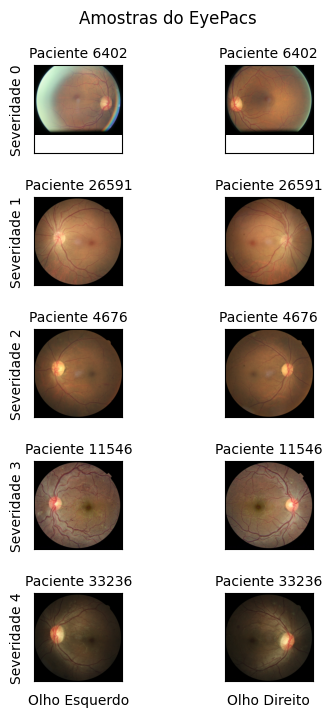

In [69]:
# Getting patient ID samples sorted by severity (ascending order)
patient_has_eyes_with_different_severities = True
while patient_has_eyes_with_different_severities:
    random_state = np.random.randint(0, int(10e3))
    print(f'Trying with random seed {random_state}')
    random_severity_samples = df.groupby('level').sample(random_state=random_state)
    patient_ids = random_severity_samples['patient_id'].values
    dataset_base_path = '../datasets/reduced_eyepacs_resized_cropped'

    fig_eye_samples, axes = plt.subplots(nrows=5, ncols=2, figsize=(4.5, 8), sharex=True, sharey=True)
    plt.subplots_adjust(hspace=0.5)
    fig_eye_samples.suptitle('Amostras do EyePacs', y=0.95)
    eye_with_different_severity = False
    for i, patient_id in enumerate(patient_ids):
        patient_metadata = df.loc[df['patient_id'] == patient_id]
        if patient_metadata.level.nunique() > 1:
            print(f'Patient with id: {patient_id} have different severities. Trying another random seed')
            eye_with_different_severity = True
            break
        # Left Eye
        left_eye_metadata = patient_metadata.loc[patient_metadata['side'] == 'left']
        left_eye_image_path = os.path.join(dataset_base_path, left_eye_metadata['image'].item())
        left_eye_image = Image.open(left_eye_image_path)
        axes[i, 0].imshow(left_eye_image)
        axes[i, 0].set_title(f'Paciente {patient_id}', fontsize=10)
        axes[i, 0].set_ylabel(f'Severidade {i}')
        axes[i, 0].set_yticklabels([])
        axes[i, 0].set_yticks([])

        # Right Eye
        right_eye_metadata = patient_metadata.loc[patient_metadata['side'] == 'right']
        right_eye_image_path = os.path.join(dataset_base_path, right_eye_metadata['image'].item())
        right_eye_image = Image.open(right_eye_image_path)
        axes[i, 1].imshow(right_eye_image)
        axes[i, 1].set_title(f'Paciente {patient_id}', fontsize=10)
        # Common
        if i == (len(patient_ids) - 1):
            axes[i, 0].set_xticks([])
            axes[i, 0].set_xticklabels([])
            axes[i, 0].set_xlabel('Olho Esquerdo', labelpad=5)

            axes[i, 1].set_xticks([])
            axes[i, 1].set_xticklabels([])
            axes[i, 1].set_xlabel('Olho Direito', labelpad=5)
    if not eye_with_different_severity:
        print('All patients has both eyes within the same RD severity classification')
        print(f'Random seed: {random_state}')
        patient_has_eyes_with_different_severities = False  

In [4]:
metadata_path = '../datasets/eyepacs/img_info_original.csv'
dataset_base_path = '../datasets/eyepacs'
df = pd.read_csv(metadata_path)

Trying with random seed 4646
All patients has both eyes within the same RD severity classification
Random seed: 4646


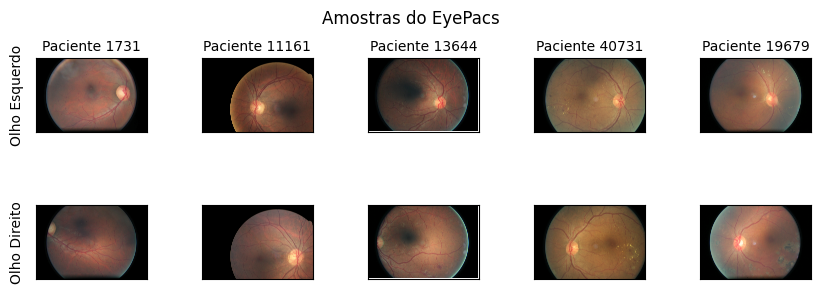

In [13]:
# Getting patient ID samples sorted by severity (ascending order)
patient_has_eyes_with_different_severities = True
while patient_has_eyes_with_different_severities:
    random_state = np.random.randint(0, int(10e3))
    print(f'Trying with random seed {random_state}')
    random_severity_samples = df.groupby('level').sample(random_state=7008)
    patient_ids = random_severity_samples['patient_id'].values
    

    fig_eye_samples, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 3.5), sharex=True, sharey=True)
    plt.subplots_adjust(wspace=0.5, hspace=0.2)
    fig_eye_samples.suptitle('Amostras do EyePacs', y=0.95)
    eye_with_different_severity = False
    for i, patient_id in enumerate(patient_ids):
        patient_metadata = df.loc[df['patient_id'] == patient_id]
        if patient_metadata.level.nunique() > 1:
            print(f'Patient with id: {patient_id} have different severities. Trying another random seed')
            eye_with_different_severity = True
            break
        # Left Eye
        left_eye_metadata = patient_metadata.loc[patient_metadata['side'] == 'left']
        left_eye_image_path = os.path.join(dataset_base_path, left_eye_metadata['image'].item())
        left_eye_image = Image.open(left_eye_image_path)
        axes[0, i].imshow(left_eye_image)
        axes[0, i].set_title(f'Paciente {patient_id}', fontsize=10)
        
        #axes[0, i].set_ylabel(f'Severidade {i}')
        axes[0, i].set_yticklabels([])
        axes[0, i].set_yticks([])

        # Right Eye
        right_eye_metadata = patient_metadata.loc[patient_metadata['side'] == 'right']
        right_eye_image_path = os.path.join(dataset_base_path, right_eye_metadata['image'].item())
        right_eye_image = Image.open(right_eye_image_path)
        axes[1, i].imshow(right_eye_image)
        #axes[1, i].set_title(f'Paciente {patient_id}', fontsize=10)
        if i == 0:
            axes[0, i].set_ylabel('Olho Esquerdo', labelpad=5)
            axes[1, i].set_ylabel('Olho Direito', labelpad=5)
        # Common
        if i == (len(patient_ids) - 1):
            axes[0, i].set_xticks([])
            axes[0, i].set_xticklabels([])
            

            axes[1, i].set_xticks([])
            axes[1, i].set_xticklabels([])
            
    if not eye_with_different_severity:
        print('All patients has both eyes within the same RD severity classification')
        print(f'Random seed: {random_state}')
        patient_has_eyes_with_different_severities = False  

In [14]:
fig_eye_samples.savefig('./images/severity_individual_samples_horizontal.png', format='png', bbox_inches='tight')

In [172]:
df = pd.read_csv('../datasets/reduced_eyepacs_resized_cropped/metadata_imbalanced.csv')

<br>

# Original Eyepacs

In [24]:
df_orig_eyepacs = pd.read_csv('../datasets/eyepacs/img_info_original.csv')

In [25]:
df_orig_eyepacs

,patient_id,side,image,level,level_group,groups
0,1,left,0/1_left.jpeg,0,nref,left_nref
1,1,right,0/1_right.jpeg,0,nref,right_nref
2,2,left,0/2_left.jpeg,0,nref,left_nref
3,2,right,0/2_right.jpeg,0,nref,right_nref
4,3,left,2/3_left.jpeg,2,ref,left_ref
...,...,...,...,...,...,...
86917,44349,right,1/44349_right.jpeg,1,nref,right_nref
86918,44350,left,0/44350_left.jpeg,0,nref,left_nref
86919,44350,right,0/44350_right.jpeg,0,nref,right_nref
86920,44351,left,0/44351_left.jpeg,0,nref,left_nref


In [28]:
fig_orig_dist.get_figwidth()

6.4

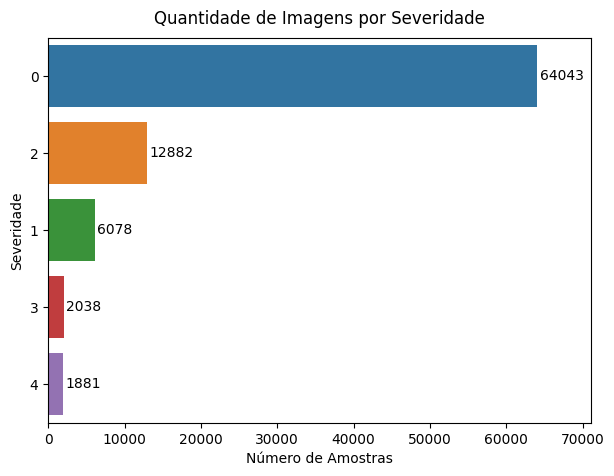

In [52]:
fig_orig_dist = plot_class_distribution(df_orig_eyepacs, width=7, xlim_tol=7e3)

In [53]:
fig_orig_dist.savefig('images/class_count_orig_eyepacs.png', format='png')